Installing the Sensor motion package

In [3]:
!pip install sensormotion


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sensormotion: filename=sensormotion-1.1.4-py3-none-any.whl size=19658 sha256=2fd692da735f07d84e79fc436a1ea1a88a73663a68a447377b9e6152bf096bc6
  Stored in directory: /root/.cache/pip/wheels/a2/a1/d6/d7229aff17b9a309282d830747f636814a3523178f171c7ffd
Successfully built sensormotion


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import sensormotion as sm

### Gait Analysis

In [5]:
sampling_rate = 100  # number of samples per second
seconds = 10
time = np.arange(0, seconds*sampling_rate) * 10  # times in milliseconds

np.random.seed(123)

x = 2*np.sin(time/30) + np.random.normal(0.5, 0.4, len(time))  # ML medio-lateral
y = 4*np.sin(time/80) + np.random.normal(1.0, 0.5, len(time))  # VT vertical
z = 3*np.sin(time/90) + np.random.normal(0.0, 0.4, len(time))  # AP antero-posterior

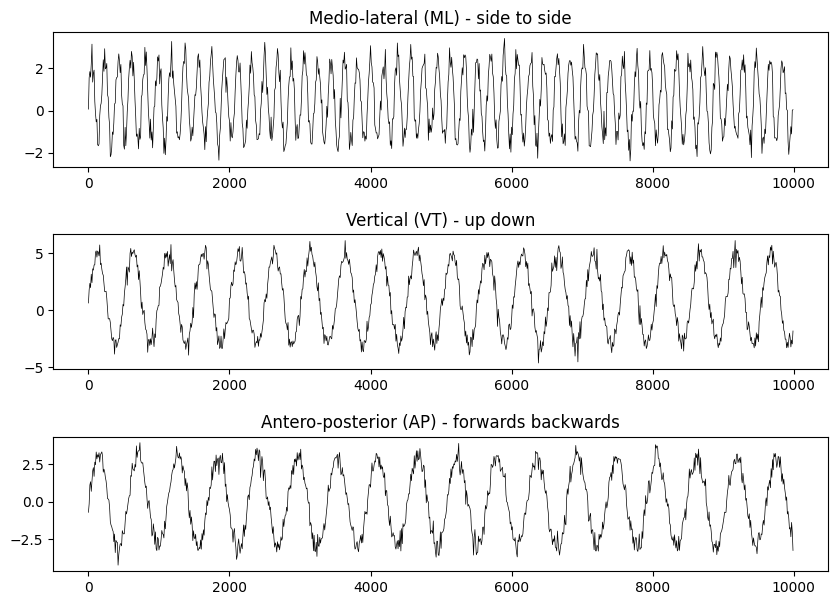

In [6]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,7))

ax[0].set_title('Medio-lateral (ML) - side to side')
ax[0].plot(time, x, linewidth=0.5, color='k')

ax[1].set_title('Vertical (VT) - up down')
ax[1].plot(time, y, linewidth=0.5, color='k')

ax[2].set_title('Antero-posterior (AP) - forwards backwards')
ax[2].plot(time, z, linewidth=0.5, color='k')

fig.subplots_adjust(hspace=.5)

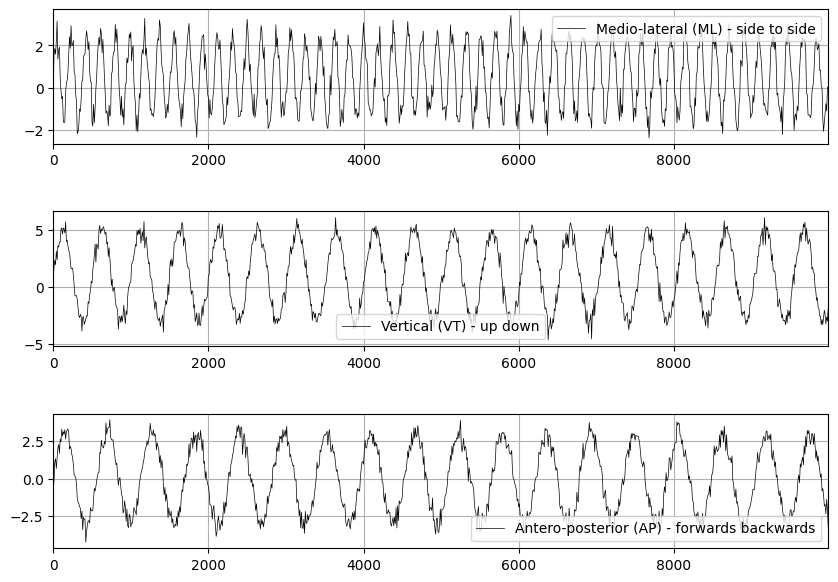

In [7]:
sm.plot.plot_signal(time, [{'data': x, 'label': 'Medio-lateral (ML) - side to side', 'line_width': 0.5},
                           {'data': y, 'label': 'Vertical (VT) - up down', 'line_width': 0.5},
                           {'data': z, 'label': 'Antero-posterior (AP) - forwards backwards', 'line_width': 0.5}],
                    subplots=True, fig_size=(10,7))

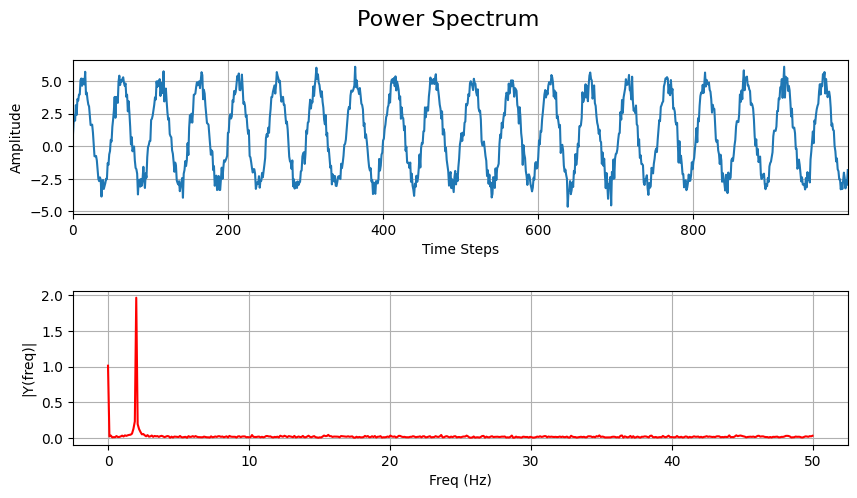

In [8]:
_ = sm.signal.fft(y, sampling_rate, plot=True)

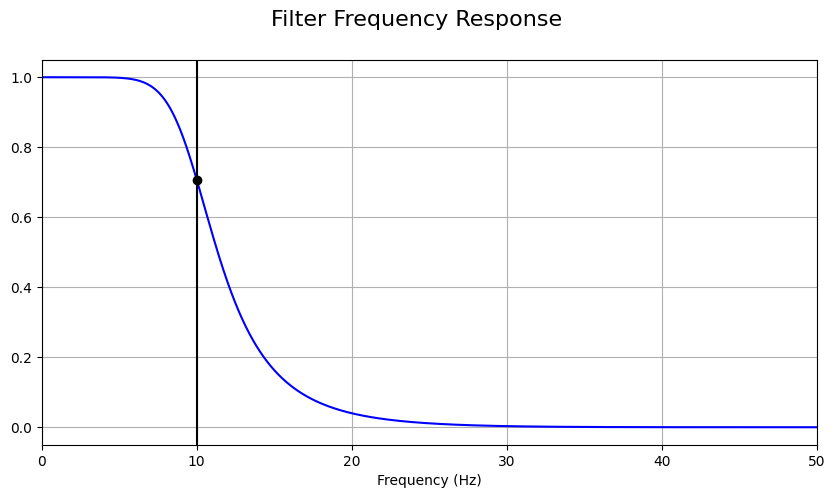

In [9]:
sm.plot.plot_filter_response(10, sampling_rate, 'low', filter_order=4)

In [10]:
# Build the filter
b, a = sm.signal.build_filter(10, sampling_rate, 'low', filter_order=4)

# Filter signals
x_f = sm.signal.filter_signal(b, a, x)  # ML medio-lateral
y_f = sm.signal.filter_signal(b, a, y)  # VT vertical
z_f = sm.signal.filter_signal(b, a, z)  # AP antero-posterior

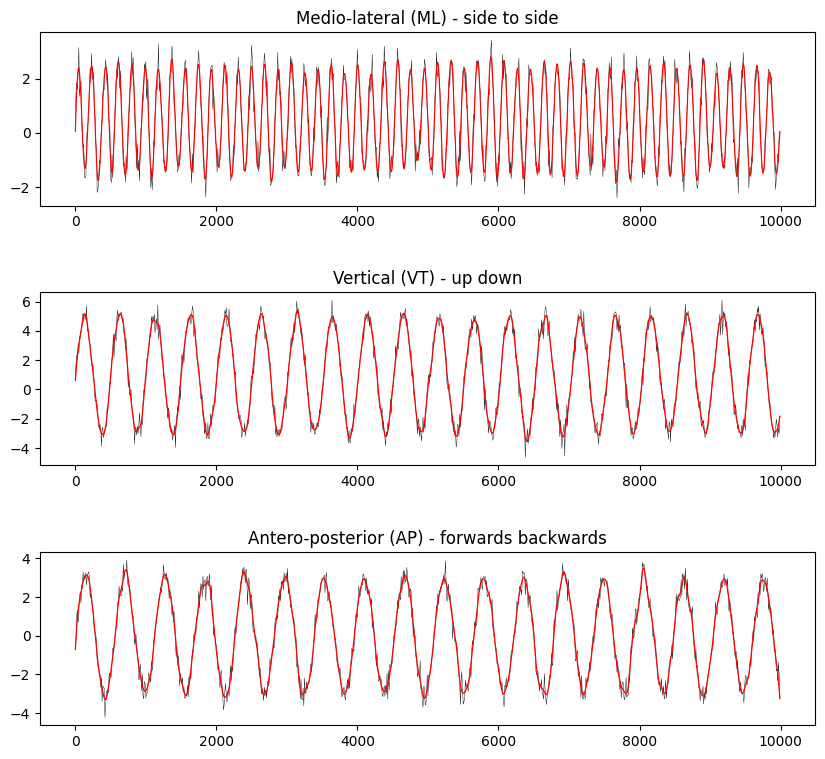

In [11]:
# Create plots with overlaid filtered signals (in red)
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,9))

ax[0].set_title('Medio-lateral (ML) - side to side')
ax[0].plot(time, x, linewidth=0.3, color='k')
ax[0].plot(time, x_f, linewidth=0.8, color='r')

ax[1].set_title('Vertical (VT) - up down')
ax[1].plot(time, y, linewidth=0.3, color='k')
ax[1].plot(time, y_f, linewidth=0.9, color='r')

ax[2].set_title('Antero-posterior (AP) - forwards backwards')
ax[2].plot(time, z, linewidth=0.3, color='k')
ax[2].plot(time, z_f, linewidth=0.9, color='r')

fig.subplots_adjust(hspace=.5)

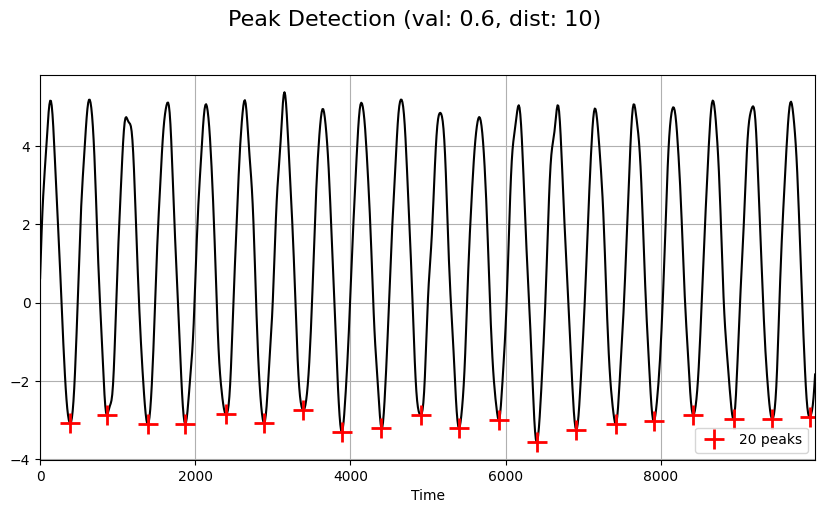

In [12]:
peak_times, peak_values = sm.peak.find_peaks(time, y_f, peak_type='valley', min_val=0.6, min_dist=10, plot=True)

In [13]:

step_count = sm.gait.step_count(peak_times)
cadence = sm.gait.cadence(time, peak_times)
step_time, step_time_sd, step_time_cov = sm.gait.step_time(peak_times)

print(' - Number of steps: {}'.format(step_count))
print(' - Cadence: {:.2f} steps/min'.format(cadence))
print(' - Mean step time: {:.2f}ms'.format(step_time))
print(' - Step time variability (standard deviation): {:.2f}'.format(step_time_sd))
print(' - Step time variability (coefficient of variation): {:.2f}'.format(step_time_cov))

 - Number of steps: 20
 - Cadence: 120.12 steps/min
 - Mean step time: 501.58ms
 - Step time variability (standard deviation): 15.98
 - Step time variability (coefficient of variation): 0.03


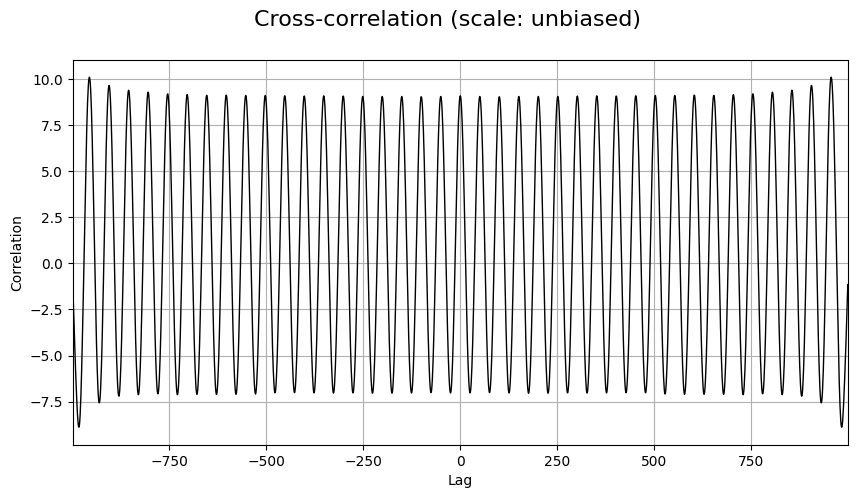

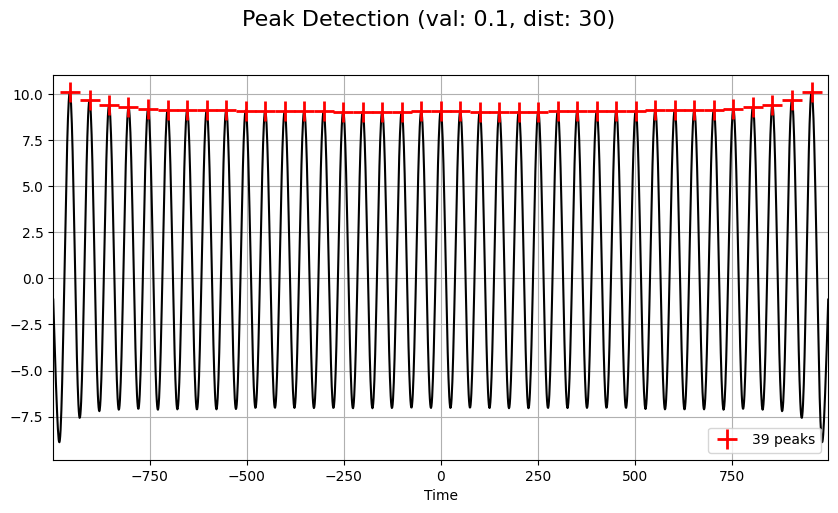

 - Step regularity: 0.9959
 - Stride regularity: 0.9943
 - Step symmetry: 0.9983


In [14]:
ac, ac_lags = sm.signal.xcorr(y_f, y_f, scale='unbiased', plot=True)

ac_peak_times, ac_peak_values = sm.peak.find_peaks(ac_lags, ac, peak_type='peak', min_val=0.1, min_dist=30, plot=True)

step_reg, stride_reg = sm.gait.step_regularity(ac_peak_values)
step_sym = sm.gait.step_symmetry(ac_peak_values)

print(' - Step regularity: {:.4f}'.format(step_reg))
print(' - Stride regularity: {:.4f}'.format(stride_reg))
print(' - Step symmetry: {:.4f}'.format(step_sym))

### Physical Activity

In [15]:

sampling_rate = 100  # number of samples per second
seconds = 600
time = np.arange(0, seconds*sampling_rate+1) * 10  # times in milliseconds

np.random.seed(123)

x = 2*np.sin(time/30) + np.random.normal(0.5, 0.4, len(time))  # ML medio-lateral
y = 4*np.sin(time/80) + np.random.normal(1.0, 0.5, len(time))  # VT vertical
z = 3*np.sin(time/90) + np.random.normal(0.0, 0.4, len(time))  # AP antero-posterior

# Adjust amount of movement at various timepoints
signals = [x, y, z]

for s in signals:
    s[20000:40000] = s[20000:40000] * 10
    s[40000:] = s[40000:] * 50

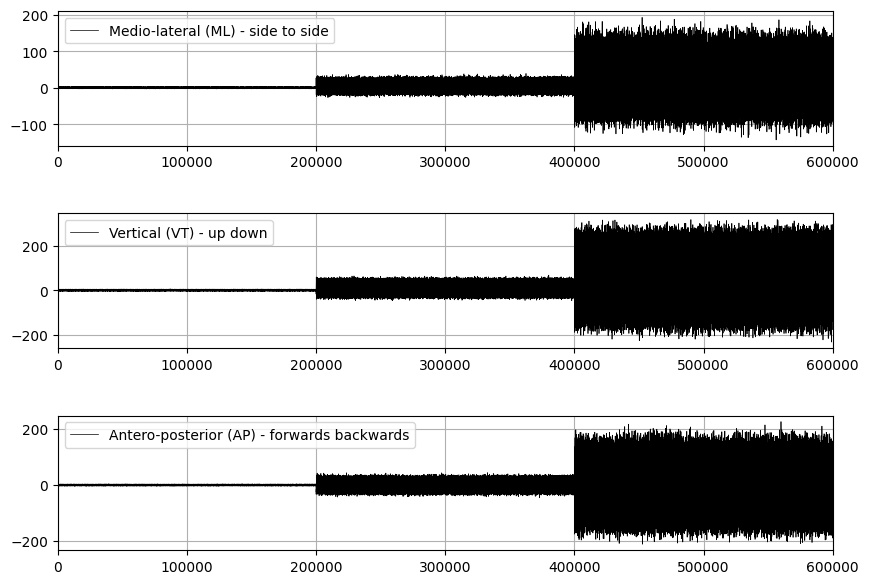

In [16]:
sm.plot.plot_signal(time, [{'data': x, 'label': 'Medio-lateral (ML) - side to side', 'line_width': 0.5},
                           {'data': y, 'label': 'Vertical (VT) - up down', 'line_width': 0.5},
                           {'data': z, 'label': 'Antero-posterior (AP) - forwards backwards', 'line_width': 0.5}],
                    subplots=True, fig_size=(10,7))

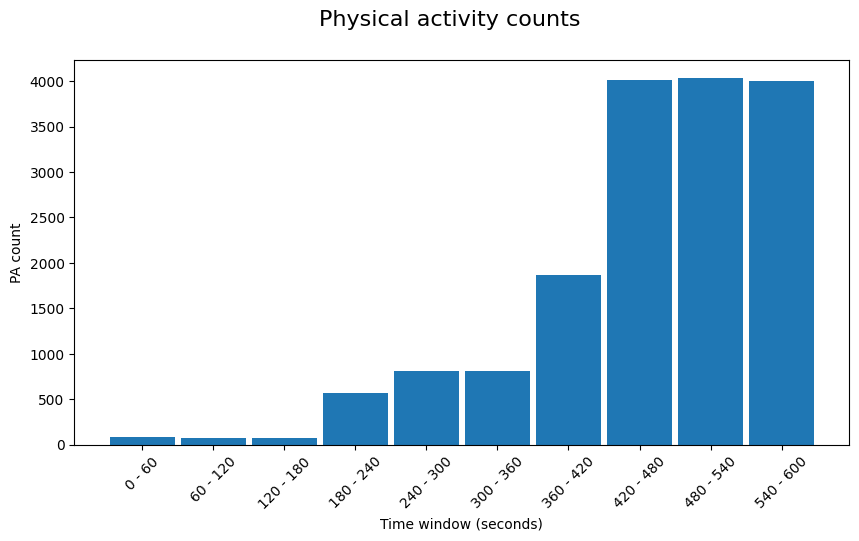

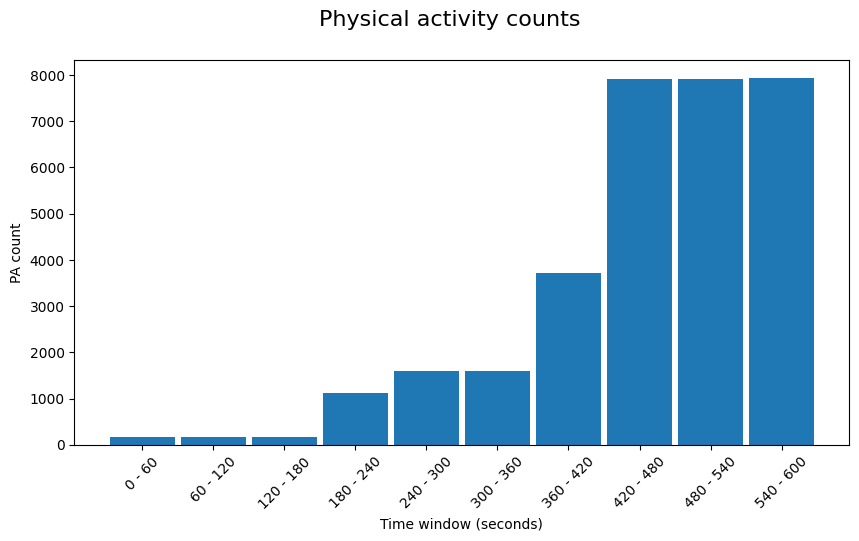

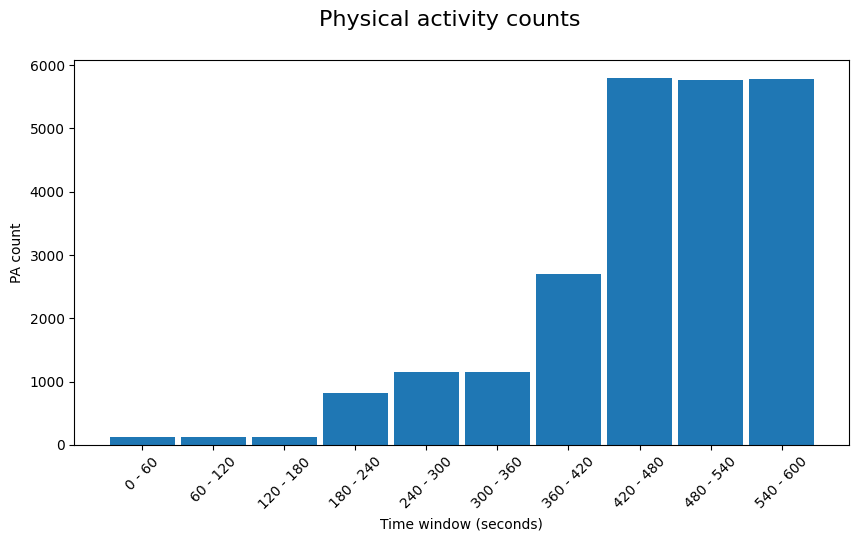

In [17]:
x_counts = sm.pa.convert_counts(x, time, time_scale='ms', epoch=60, rectify='full', integrate='simpson', plot=True)
y_counts = sm.pa.convert_counts(y, time, time_scale='ms', epoch=60, rectify='full', integrate='simpson', plot=True)
z_counts = sm.pa.convert_counts(z, time, time_scale='ms', epoch=60, rectify='full', integrate='simpson', plot=True)

In [18]:

vm = sm.signal.vector_magnitude(x_counts, y_counts, z_counts)

Cut-point set: butte_preschoolers (axis count: 3)...
sedentary: -inf to 819
light: 820 to 3907
moderate: 3908 to 6111
vigorous: 6112 to inf


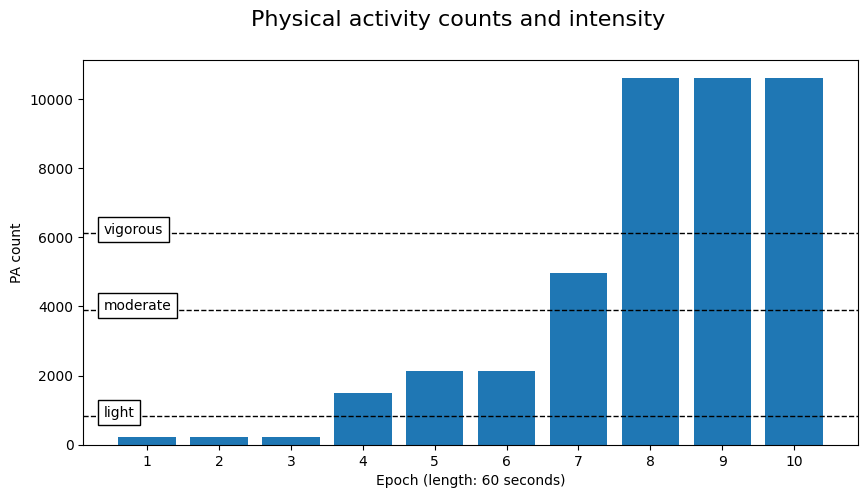

In [19]:

categories, time_spent = sm.pa.cut_points(vm, set_name='butte_preschoolers', n_axis=3, plot=True)

In [20]:
print('Categories: {}\n'.format(categories))
print('Time spent:')
print(time_spent)

Categories: ['sedentary', 'sedentary', 'sedentary', 'light', 'light', 'light', 'moderate', 'vigorous', 'vigorous', 'vigorous']

Time spent:
[['light' 'moderate' 'sedentary' 'vigorous']
 ['3' '1' '3' '3']]
